In [ ]:
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from google.colab import files

In [ ]:
upload = files.upload()

Saving Data.xlsx to Data (2).xlsx


In [ ]:
df = pd.read_excel('Data (2).xlsx')
df['Date']= pd.to_datetime(df['Date'])
df.head()

<ipython-input-42-0dccfae04821>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']= pd.to_datetime(df['Date'])


,Date,MSCI EM,MSCI US,TB3MS,US Corporate High Yield,Intermediate Yield,Equity REIT,Mortgage REIT,GOLD,US long treasury,*******,TB3M_ROR,Equity_EM_ROR,Equity_US_ROR,Bond_HY_ROR,Bond_IY_ROR,REIT_equity_ROR,REIT_mortgage_ROR,Stress_gold_ROR,Stress_LT_ROR
0,1987-12-01,10000.0,32122.540954,5.77,174.91,397.53,802.51,38.8313,484.10,339.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-01-01,10983.8,33467.346459,5.81,180.76,409.20,846.49,42.0511,458.00,359.79,NaN,0.004717,0.098380,0.041865,0.033446,0.029356,0.051956,0.076569,-0.056987,0.057172
2,1988-02-01,11021.1,34837.036256,5.66,186.61,414.68,878.86,42.0154,426.15,363.68,NaN,0.004599,0.003396,0.040926,0.032363,0.013392,0.036832,-0.000850,-0.074739,0.010696
3,1988-03-01,12204.6,33639.591152,5.70,184.67,413.79,883.23,41.3837,456.95,352.66,NaN,0.004630,0.107385,-0.034373,-0.010396,-0.002146,0.004948,-0.015264,0.067403,-0.031248
4,1988-04-01,12856.1,33915.912167,5.91,186.08,413.19,889.37,41.2377,449.00,346.47,NaN,0.004796,0.053382,0.008214,0.007635,-0.001450,0.006904,-0.003540,-0.017706,-0.017866


# 1. Replicating Momentum Strategies

3 funtion respectively for 4 asset-type momentum portifolio. All portifolio are long-only.

1. dual momentum: first compare asset 1 and 2, then use the better one to compare with T-bill

2. relative momentum: only compare asset 1 and 2, ignore T-bill.

3. absoulute momentum: for both asset 1 and 2, compare its performance with T-bill.

In [ ]:
def dual_mom(asset1, asset2, tbill, type):
  df[f'Dual_{type}']= float('nan')
  for i in range(13,len(df['Date'])):
    asset1_12m=1
    asset2_12m=1
    tbill_12m=1

    for n in range(2,13): #use 11 month ror, with 1 momth-reversal
      asset1_12m*= (df[asset1][i-n]+1)
      asset2_12m*= (df[asset2][i-n]+1)
      tbill_12m= tbill_12m* (df[tbill][i-n]+1)

    asset1_12m-=1
    asset2_12m-=1
    tbill_12m-=1

    if (asset1_12m >=asset2_12m) and (asset1_12m >=tbill_12m):
      df[f'Dual_{type}'][i]=df[asset1][i]
    elif (asset1_12m < asset2_12m) and (asset2_12m >=tbill_12m):
      df[f'Dual_{type}'][i]=df[asset2][i]
    else:
      df[f'Dual_{type}'][i]=df[tbill][i]

In [ ]:
def relative_mom(asset1, asset2,type):
  df[f'relative_{type}']= float('nan')
  for i in range(13,len(df['Date'])):
    asset1_12m=1
    asset2_12m=1

    for n in range(2,13): #use 11 month ror
      asset1_12m*= (df[asset1][i-n]+1)
      asset2_12m*= (df[asset2][i-n]+1)
    asset1_12m-=1
    asset2_12m-=1

    if asset1_12m >=asset2_12m:
      df[f'relative_{type}'][i]=df[asset1][i]
    else:
      df[f'relative_{type}'][i]=df[asset2][i]

In [ ]:
def abs_mom(asset, tbill, type):
  df[f'absolute_{asset}_{type}']=float('nan')
  for i in range(13,len(df['Date'])):
    asset_12m=1
    tbill_12m=1

    for n in range(2,13): #use 11 month ror
      asset_12m= asset_12m* (df[asset][i-n]+1)
      tbill_12m= tbill_12m* ((df[tbill][i-n])+1)

    asset_12m-=1
    tbill_12m-=1

    if asset_12m >=tbill_12m:
       df[f'absolute_{asset}_{type}'][i]=df[asset][i]
    else:
       df[f'absolute_{asset}_{type}'][i]=df[tbill][i]

## Equity
Momentum returns starting from Jan, 1989

Use MCSI US and MSCI EM index as our instruments

In [ ]:
relative_mom('Equity_US_ROR','Equity_EM_ROR','Equity')
abs_mom('Equity_US_ROR', 'TB3M_ROR', 'Equity')
abs_mom('Equity_EM_ROR', 'TB3M_ROR', 'Equity')
dual_mom('Equity_US_ROR','Equity_EM_ROR','TB3M_ROR','Equity')

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'Dual_{type}'][i]=df[asset1][i]
<ipython-input-43-d6cb8248ce33>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Dual_{type}'][i]=df[asset1][i]
<ipython-input-43-d6cb8248ce33>:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when yo

## Equity Module Performance

In [ ]:
cr_equity = df.copy()#compound return
p= ['Dual_Equity', 'relative_Equity',
       'absolute_Equity_EM_ROR_Equity', 'absolute_Equity_US_ROR_Equity', 'Equity_US_ROR', 'Equity_EM_ROR' ]

for i in p:
  cr_equity[i][13]= 1+ cr_equity[i][13]
  for n in range(14, len(cr_equity[i])):
    cr_equity[i][n]= cr_equity[i][n-1] * (cr_equity[i][n]+1)
cr_equity[['Date','Dual_Equity', 'relative_Equity',
       'absolute_Equity_EM_ROR_Equity', 'absolute_Equity_US_ROR_Equity', 'Equity_US_ROR', 'Equity_EM_ROR' ]]

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cr_equity[i][n]= cr_equity[i][n-1] * (cr_equity[i][n]+1)
<ipython-input-48-e0280f4b024d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_equity[i][n]= cr_equity[i][n-1] * (cr_equity[i][n]+1)
<ipython-input-48-e0280f4b024d>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave

,Date,Dual_Equity,relative_Equity,absolute_Equity_EM_ROR_Equity,absolute_Equity_US_ROR_Equity,Equity_US_ROR,Equity_EM_ROR
0,1987-12-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-01-01,NaN,NaN,NaN,NaN,0.041865,0.098380
2,1988-02-01,NaN,NaN,NaN,NaN,0.040926,0.003396
3,1988-03-01,NaN,NaN,NaN,NaN,-0.034373,0.107385
4,1988-04-01,NaN,NaN,NaN,NaN,0.008214,0.053382
...,...,...,...,...,...,...,...
441,2024-09-01,115.539934,128.700340,14.670863,47.761949,36.027165,21.993490
442,2024-10-01,114.658636,127.718659,14.006765,47.397638,35.752363,20.997922
443,2024-11-01,121.787817,135.659878,13.471875,50.344701,37.975353,20.196054
444,2024-12-01,118.647855,132.162264,13.497546,49.046703,36.996264,20.234538


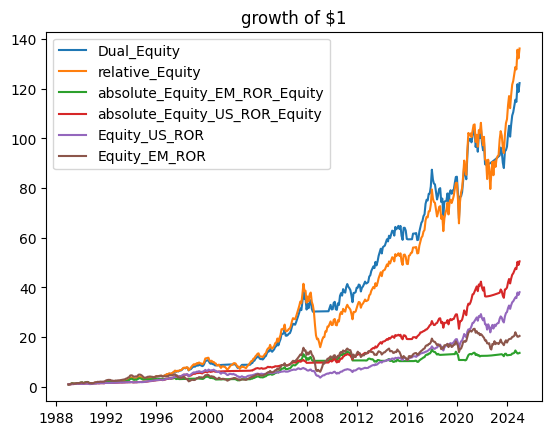

In [ ]:
for i in p:
  plt.plot(cr_equity['Date'][13:], cr_equity[i][13:], label= i)
plt.title('growth of $1')
plt.legend()
plt.show()

In [ ]:
output_equity = pd.DataFrame()
output_equity['portifolio']=['Dual_Equity', 'relative_Equity',
       'absolute_Equity_EM_ROR_Equity', 'absolute_Equity_US_ROR_Equity', 'Equity_US_ROR', 'Equity_EM_ROR' ]

In [ ]:
def geo_mean(data):
  n=len(data)
  sum=1
  for i in range(13,n):
    sum=sum*(1+data[i])
  return sum**(1/(n-13))-1

In [ ]:
output_equity['Annual Return']=float('nan')
for i in range (len(output_equity['portifolio'])):
  data=df[output_equity['portifolio'][i]]
  output_equity['Annual Return'][i]=(geo_mean(data)+1)**12-1

<ipython-input-54-870bb5cf3f18>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_equity['Annual Return'][i]=(geo_mean(data)+1)**12-1
<ipython-input-54-870bb5cf3f18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [ ]:
output_equity['Excess Return']=float('nan')
for i in range (len(output_equity['portifolio'])):
  data=df[output_equity['portifolio'][i]] - df['TB3M_ROR']
  output_equity['Excess Return'][i]=(geo_mean(data)+1)**12-1

<ipython-input-59-6d1435c71b09>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_equity['Excess Return'][i]=(geo_mean(data)+1)**12-1
<ipython-input-59-6d1435c71b09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [ ]:
output_equity['Annual std']=float('nan')
for i in range (len(output_equity['portifolio'])):
  data=df[output_equity['portifolio'][i]][13:]
  output_equity['Annual std'][i]=data.std()*np.sqrt(12)

<ipython-input-55-b22ac4c54c65>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_equity['Annual std'][i]=data.std()*np.sqrt(12)
<ipython-input-55-b22ac4c54c65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
output_equity['Annual Sharpe']=float('nan')
for i in range (len(output_equity['portifolio'])):
  data=df[output_equity['portifolio'][i]][13:]
  output_equity['Annual Sharpe'][i]=output_equity['Excess Return'][i]/output_equity['Annual std'][i]

<ipython-input-61-b309aa1904e5>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_equity['Annual Sharpe'][i]=output_equity['Excess Return'][i]/output_equity['Annual std'][i]
<ipython-input-61-b309aa1904e5>:4: SettingWithCopyWarning: 
A

In [ ]:
def drawdown(data):
  cumulative_returns = (1 + data[13:]).cumprod()

  # Step 2: Calculate running maximum
  running_max = cumulative_returns.cummax()

# Step 3: Calculate drawdowns
  drawdowns = (cumulative_returns - running_max) / running_max

# Step 4: Calculate maximum drawdown
  max_drawdown = drawdowns.min()
  return max_drawdown


In [ ]:
output_equity['drawdown']=float('nan')
for i in range (len(output_equity['portifolio'])):
  p=df[output_equity['portifolio'][i]]
  output_equity['drawdown'][i]=drawdown(p)

<ipython-input-63-1d881efeac85>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_equity['drawdown'][i]=drawdown(p)
<ipython-input-63-1d881efeac85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [ ]:
output_equity['% profit month']=float('nan')
for i in range (len(output_equity['portifolio'])):
  p=df[output_equity['portifolio'][i]][13:]
  output_equity['% profit month'][i]= (p>0).mean()*100

<ipython-input-64-14cb0831997d>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_equity['% profit month'][i]= (p>0).mean()*100
<ipython-input-64-14cb0831997d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [ ]:
output_equity

,portifolio,Annual Return,Annual std,Excess Return,Annual Sharpe,drawdown,% profit month
0,Dual_Equity,0.142466,0.163045,0.111600,0.684473,-0.286938,71.824480
1,relative_Equity,0.145887,0.187315,0.114914,0.613477,-0.615085,65.357968
2,absolute_Equity_EM_ROR_Equity,0.075212,0.153637,0.046012,0.299488,-0.356740,76.212471
3,absolute_Equity_US_ROR_Equity,0.114836,0.117553,0.084649,0.720092,-0.198972,75.288684
4,Equity_US_ROR,0.106159,0.148787,0.076172,0.511952,-0.511222,65.588915
5,Equity_EM_ROR,0.087345,0.219852,0.057773,0.262783,-0.614432,59.815242


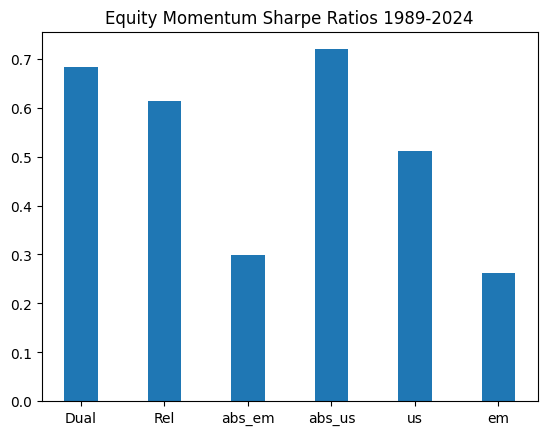

In [ ]:
output_equity['p']=['Dual','Rel', 'abs_em', 'abs_us','us','em']
plt.bar(output_equity['p'],output_equity['Annual Sharpe'], width = 0.4)
plt.title("Equity Momentum Sharpe Ratios 1989-2024")
plt.show()

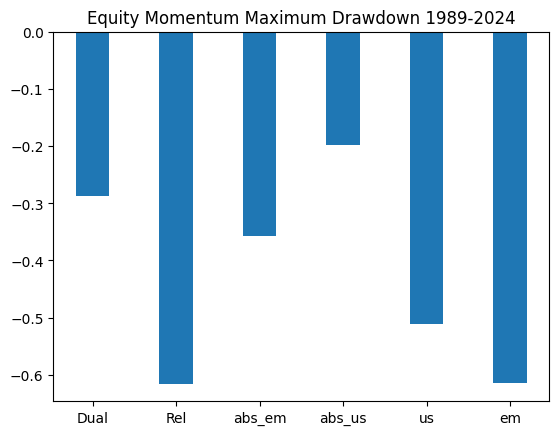

In [ ]:
plt.bar(output_equity['p'],output_equity['drawdown'], width = 0.4)
plt.title("Equity Momentum Maximum Drawdown 1989-2024")
plt.show()

## Credit

We use US Corporate Hiigh Yield and Intermediate Yield as our credit instrument

In [ ]:
relative_mom('Bond_HY_ROR','Bond_IY_ROR','Credit')
abs_mom('Bond_HY_ROR', 'TB3M_ROR', 'Credit')
abs_mom('Bond_IY_ROR', 'TB3M_ROR', 'Credit')
dual_mom('Bond_HY_ROR','Bond_IY_ROR', 'TB3M_ROR','Credit')

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'Dual_{type}'][i]=df[asset2][i]
<ipython-input-43-d6cb8248ce33>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Dual_{type}'][i]=df[asset2][i]
<ipython-input-43-d6cb8248ce33>:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when yo

## Credit Module Performance

In [ ]:
cr_credit = df.copy()#compound return
p= ['Dual_Credit', 'relative_Credit', 'absolute_Bond_HY_ROR_Credit',
       'absolute_Bond_IY_ROR_Credit', 'Bond_HY_ROR', 'Bond_IY_ROR']

for i in p:
  cr_credit[i][13]= 1+ cr_credit[i][13]
  for n in range(14, len(cr_credit[i])):
    cr_credit[i][n]= cr_credit[i][n-1] * (cr_credit[i][n]+1)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cr_credit[i][n]= cr_credit[i][n-1] * (cr_credit[i][n]+1)
<ipython-input-71-4d0ba321fc8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_credit[i][n]= cr_credit[i][n-1] * (cr_credit[i][n]+1)
<ipython-input-71-4d0ba321fc8e>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave

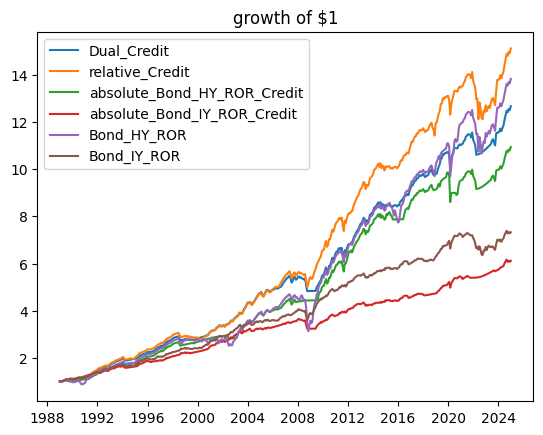

In [ ]:
for i in p:
  plt.plot(cr_credit['Date'][13:], cr_credit[i][13:], label= i)
plt.title('growth of $1')
plt.legend()
plt.show()

In [ ]:
output_credit = pd.DataFrame()
output_credit['portifolio']=['Dual_Credit', 'relative_Credit', 'absolute_Bond_HY_ROR_Credit',
       'absolute_Bond_IY_ROR_Credit', 'Bond_HY_ROR', 'Bond_IY_ROR']

In [ ]:
output_credit['Annual Return']=float('nan')
for i in range (len(output_credit['portifolio'])):
  data=df[output_credit['portifolio'][i]]
  output_credit['Annual Return'][i]=(geo_mean(data)+1)**12-1

<ipython-input-75-c0edad9860c6>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_credit['Annual Return'][i]=(geo_mean(data)+1)**12-1
<ipython-input-75-c0edad9860c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [ ]:
output_credit['Excess Return']=float('nan')
for i in range (len(output_credit['portifolio'])):
  data=df[output_credit['portifolio'][i]] - df['TB3M_ROR']
  output_credit['Excess Return'][i]=(geo_mean(data)+1)**12-1

<ipython-input-76-356afb30a7f9>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_credit['Excess Return'][i]=(geo_mean(data)+1)**12-1
<ipython-input-76-356afb30a7f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [ ]:
output_credit['Annual std']=float('nan')
for i in range (len(output_credit['portifolio'])):
  data=df[output_credit['portifolio'][i]][13:]
  output_credit['Annual std'][i]=data.std()*np.sqrt(12)

<ipython-input-77-c93d667c686a>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_credit['Annual std'][i]=data.std()*np.sqrt(12)
<ipython-input-77-c93d667c686a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
output_credit['Annual Sharpe']=float('nan')
for i in range (len(output_credit['portifolio'])):
  data=df[output_credit['portifolio'][i]][13:]
  output_credit['Annual Sharpe'][i]=output_credit['Excess Return'][i]/output_credit['Annual std'][i]

<ipython-input-78-e17a47421eac>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_credit['Annual Sharpe'][i]=output_credit['Excess Return'][i]/output_credit['Annual std'][i]
<ipython-input-78-e17a47421eac>:4: SettingWithCopyWarning: 
A

In [ ]:
output_credit['drawdown']=float('nan')
for i in range (len(output_credit['portifolio'])):
  p=df[output_credit['portifolio'][i]]
  output_credit['drawdown'][i]=drawdown(p)

<ipython-input-79-5c43b8475065>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_credit['drawdown'][i]=drawdown(p)
<ipython-input-79-5c43b8475065>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [ ]:
output_credit['% profit month']=float('nan')
for i in range (len(output_credit['portifolio'])):
  p=df[output_credit['portifolio'][i]][13:]
  output_credit['% profit month'][i]= (p>0).mean()*100

<ipython-input-80-42cb1939427b>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_credit['% profit month'][i]= (p>0).mean()*100
<ipython-input-80-42cb1939427b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [ ]:
output_credit

,portifolio,Annual Return,Excess Return,Annual std,Annual Sharpe,drawdown,% profit month
0,Dual_Credit,0.072896,0.043743,0.045714,0.956896,-0.117982,78.983834
1,relative_Credit,0.078155,0.048867,0.051986,0.940014,-0.141901,74.595843
2,absolute_Bond_HY_ROR_Credit,0.068537,0.039479,0.049493,0.797665,-0.127080,83.140878
3,absolute_Bond_IY_ROR_Credit,0.051463,0.022858,0.034424,0.664017,-0.113494,78.752887
4,Bond_HY_ROR,0.075489,0.046231,0.085230,0.542429,-0.333071,71.593533
5,Bond_IY_ROR,0.056746,0.028011,0.041177,0.680250,-0.127911,69.745958


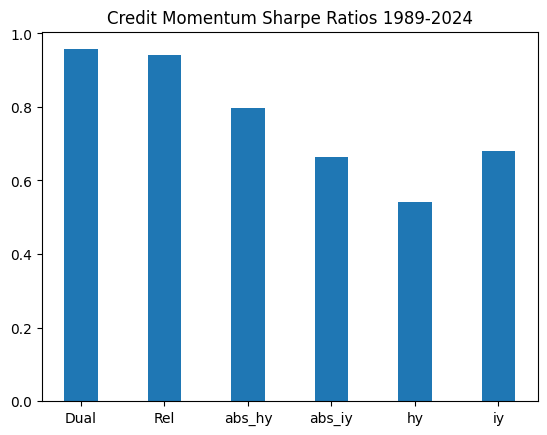

In [ ]:
output_credit['p']=['Dual','Rel', 'abs_hy', 'abs_iy','hy','iy']
plt.bar(output_credit['p'],output_credit['Annual Sharpe'], width = 0.4)
plt.title("Credit Momentum Sharpe Ratios 1989-2024")
plt.show()

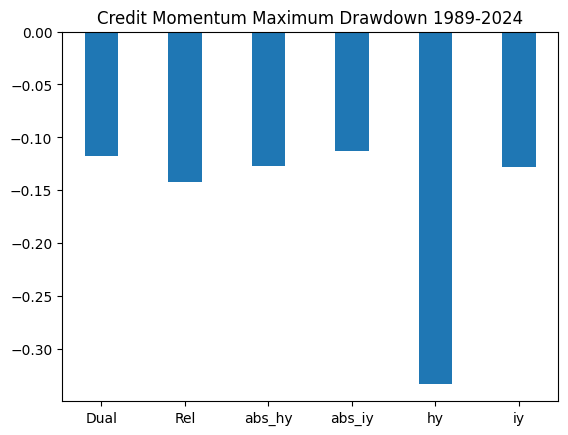

In [ ]:
plt.bar(output_credit['p'],output_credit['drawdown'], width = 0.4)
plt.title("Credit Momentum Maximum Drawdown 1989-2024")
plt.show()

## REIT

we use Equity REIT and Mortage REIT for reit momentum

In [ ]:
relative_mom('REIT_equity_ROR','REIT_mortgage_ROR','REIT')
abs_mom('REIT_equity_ROR', 'TB3M_ROR', 'REIT')
abs_mom('REIT_mortgage_ROR', 'TB3M_ROR', 'REIT')
dual_mom('REIT_equity_ROR','REIT_mortgage_ROR','TB3M_ROR','REIT')

Output hidden; open in https://colab.research.google.com to view.

## REIT Module Performance

In [ ]:
cr_reit = df.copy()#compound return
p= ['Dual_REIT', 'relative_REIT',
       'absolute_REIT_equity_ROR_REIT', 'absolute_REIT_mortgage_ROR_REIT', 'REIT_equity_ROR', 'REIT_mortgage_ROR']

for i in p:
  cr_reit[i][13]= 1+ cr_reit[i][13]
  for n in range(14, len(cr_reit[i])):
    cr_reit[i][n]= cr_reit[i][n-1] * (cr_reit[i][n]+1)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cr_reit[i][n]= cr_reit[i][n-1] * (cr_reit[i][n]+1)
<ipython-input-85-736341b1a797>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_reit[i][n]= cr_reit[i][n-1] * (cr_reit[i][n]+1)
<ipython-input-85-736341b1a797>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.


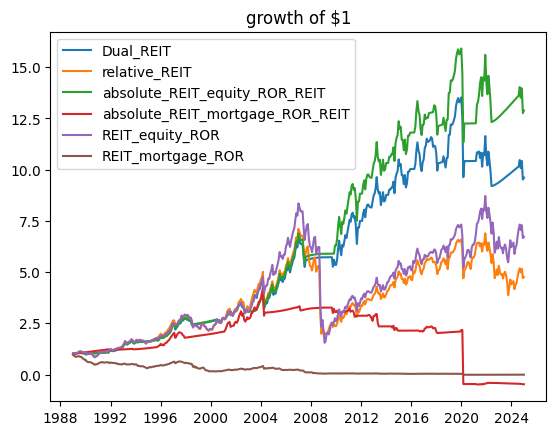

In [ ]:
for i in p:
  plt.plot(cr_reit['Date'][13:], cr_reit[i][13:], label= i)
plt.title('growth of $1')
plt.legend()
plt.show()

In [ ]:
output_reit = pd.DataFrame()
output_reit['portifolio']=['Dual_REIT', 'relative_REIT',
       'absolute_REIT_equity_ROR_REIT', 'absolute_REIT_mortgage_ROR_REIT', 'REIT_equity_ROR', 'REIT_mortgage_ROR']

In [ ]:
output_reit['Annual Return']=float('nan')
for i in range (len(output_reit['portifolio'])):
  data=df[output_reit['portifolio'][i]]
  output_reit['Annual Return'][i]=(geo_mean(data)+1)**12-1

<ipython-input-89-7810a207c824>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_reit['Annual Return'][i]=(geo_mean(data)+1)**12-1
<ipython-input-89-7810a207c824>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [ ]:
output_reit['Excess Return']=float('nan')
for i in range (len(output_reit['portifolio'])):
  data=df[output_reit['portifolio'][i]] - df['TB3M_ROR']
  output_reit['Excess Return'][i]=(geo_mean(data)+1)**12-1

<ipython-input-90-1987cec09486>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_reit['Excess Return'][i]=(geo_mean(data)+1)**12-1
<ipython-input-90-1987cec09486>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [ ]:
output_reit['Annual std']=float('nan')
for i in range (len(output_reit['portifolio'])):
  data=df[output_reit['portifolio'][i]][13:]
  output_reit['Annual std'][i]=data.std()*np.sqrt(12)

<ipython-input-91-60e539838e28>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_reit['Annual std'][i]=data.std()*np.sqrt(12)
<ipython-input-91-60e539838e28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [ ]:
output_reit['Annual Sharpe']=float('nan')
for i in range (len(output_reit['portifolio'])):
  data=df[output_reit['portifolio'][i]][13:]
  output_reit['Annual Sharpe'][i]=output_reit['Excess Return'][i]/output_reit['Annual std'][i]

<ipython-input-92-fdf4155c8008>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_reit['Annual Sharpe'][i]=output_reit['Excess Return'][i]/output_reit['Annual std'][i]
<ipython-input-92-fdf4155c8008>:4: SettingWithCopyWarning: 
A value

In [ ]:
output_reit['drawdown']=float('nan')
for i in range (len(output_reit['portifolio'])):
  p=df[output_reit['portifolio'][i]]
  output_reit['drawdown'][i]=drawdown(p)

<ipython-input-93-3ad2f8946ba4>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_reit['drawdown'][i]=drawdown(p)
<ipython-input-93-3ad2f8946ba4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
output_reit['% profit month']=float('nan')
for i in range (len(output_reit['portifolio'])):
  p=df[output_reit['portifolio'][i]][13:]
  output_reit['% profit month'][i]= (p>0).mean()*100

<ipython-input-94-2eb89b278144>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_reit['% profit month'][i]= (p>0).mean()*100
<ipython-input-94-2eb89b278144>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
output_reit

,portifolio,Annual Return,Excess Return,Annual std,Annual Sharpe,drawdown,% profit month
0,Dual_REIT,0.064728,0.035760,0.138078,0.258981,-0.320545,73.903002
1,relative_REIT,0.044184,0.015721,0.192473,0.081679,-0.726065,60.508083
2,absolute_REIT_equity_ROR_REIT,0.073406,0.044206,0.123144,0.358981,-0.287983,75.057737
3,absolute_REIT_mortgage_ROR_REIT,NaN,NaN,0.225963,NaN,-1.114744,86.374134
4,REIT_equity_ROR,0.054235,0.025518,0.194618,0.131120,-0.814109,60.739030
5,REIT_mortgage_ROR,NaN,NaN,0.297094,NaN,-1.014285,53.117783


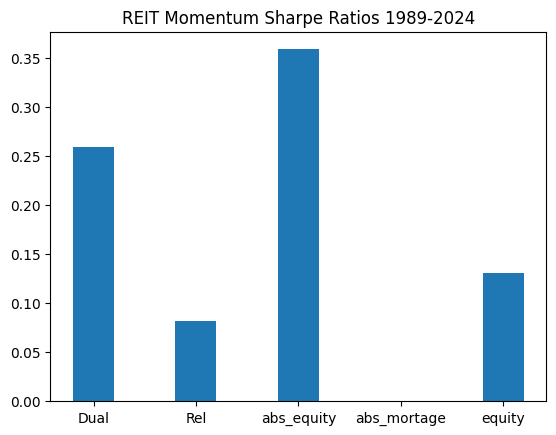

In [ ]:
output_reit['p']=['Dual','Rel', 'abs_equity', 'abs_mortage','equity','mortage']
plt.bar(output_reit['p'],output_reit['Annual Sharpe'], width = 0.4)
plt.title("REIT Momentum Sharpe Ratios 1989-2024")
plt.show()

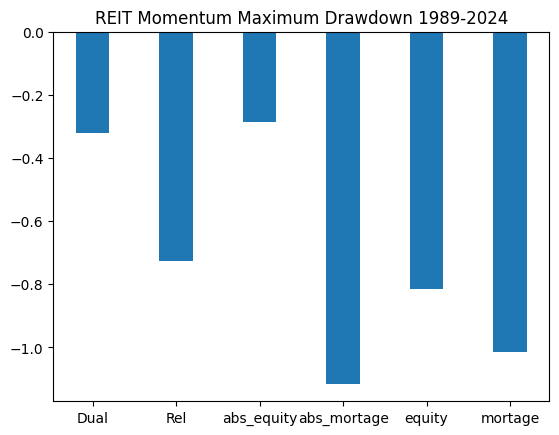

In [ ]:
plt.bar(output_reit['p'],output_reit['drawdown'], width = 0.4)
plt.title("REIT Momentum Maximum Drawdown 1989-2024")
plt.show()

## Economic Stress

we use Gold and Barclays Capital US Long treasury bond for our economic stress assets

In [ ]:
relative_mom('Stress_gold_ROR','Stress_LT_ROR','Stress')
abs_mom('Stress_gold_ROR', 'TB3M_ROR', 'Stress')
abs_mom('Stress_LT_ROR', 'TB3M_ROR', 'Stress')
dual_mom('Stress_gold_ROR','Stress_LT_ROR','TB3M_ROR','Stress')

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'Dual_{type}'][i]=df[asset2][i]
<ipython-input-43-d6cb8248ce33>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Dual_{type}'][i]=df[asset2][i]
<ipython-input-43-d6cb8248ce33>:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when yo

## Stress Module Performance

In [ ]:
cr_stress = df.copy()#compound return
p= ['Dual_Stress','relative_Stress', 'absolute_Stress_gold_ROR_Stress',
       'absolute_Stress_LT_ROR_Stress','Stress_gold_ROR',
       'Stress_LT_ROR']

for i in p:
  cr_stress[i][13]= 1+ cr_stress[i][13]
  for n in range(14, len(cr_stress[i])):
    cr_stress[i][n]= cr_stress[i][n-1] * (cr_stress[i][n]+1)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cr_stress[i][n]= cr_stress[i][n-1] * (cr_stress[i][n]+1)
<ipython-input-100-6d22449319c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_stress[i][n]= cr_stress[i][n-1] * (cr_stress[i][n]+1)
<ipython-input-100-6d22449319c4>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will beha

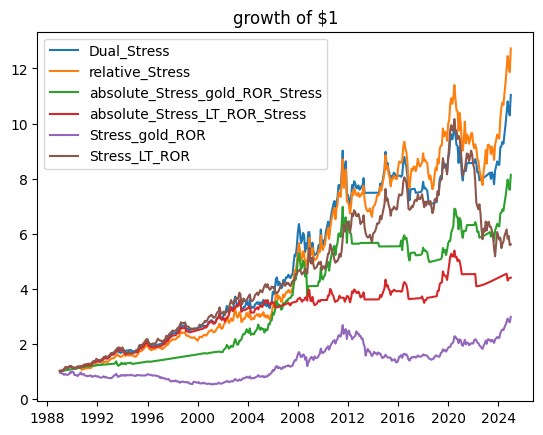

In [ ]:
for i in p:
  plt.plot(cr_stress['Date'][13:], cr_stress[i][13:], label= i)
plt.title('growth of $1')
plt.legend()
plt.show()

In [ ]:
output_stress = pd.DataFrame()
output_stress['portifolio']=['Dual_Stress','relative_Stress', 'absolute_Stress_gold_ROR_Stress',
       'absolute_Stress_LT_ROR_Stress','Stress_gold_ROR',
       'Stress_LT_ROR']

In [ ]:
output_stress['Annual Return']=float('nan')
for i in range (len(output_stress['portifolio'])):
  data=df[output_stress['portifolio'][i]]
  output_stress['Annual Return'][i]=(geo_mean(data)+1)**12-1

<ipython-input-104-f079537f8424>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_stress['Annual Return'][i]=(geo_mean(data)+1)**12-1
<ipython-input-104-f079537f8424>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [ ]:
output_stress['Excess Return']=float('nan')
for i in range (len(output_stress['portifolio'])):
  data=df[output_stress['portifolio'][i]] - df['TB3M_ROR']
  output_stress['Excess Return'][i]=(geo_mean(data)+1)**12-1

<ipython-input-105-e8264b5b43ce>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_stress['Excess Return'][i]=(geo_mean(data)+1)**12-1
<ipython-input-105-e8264b5b43ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [ ]:
output_stress['Annual std']=float('nan')
for i in range (len(output_stress['portifolio'])):
  data=df[output_stress['portifolio'][i]][13:]
  output_stress['Annual std'][i]=data.std()*np.sqrt(12)

<ipython-input-106-defd8c91ab77>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_stress['Annual std'][i]=data.std()*np.sqrt(12)
<ipython-input-106-defd8c91ab77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
output_stress['Annual Sharpe']=float('nan')
for i in range (len(output_stress['portifolio'])):
  data=df[output_stress['portifolio'][i]][13:]
  output_stress['Annual Sharpe'][i]=output_stress['Excess Return'][i]/output_stress['Annual std'][i]

<ipython-input-107-d34913a45fc9>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_stress['Annual Sharpe'][i]=output_stress['Excess Return'][i]/output_stress['Annual std'][i]
<ipython-input-107-d34913a45fc9>:4: SettingWithCopyWarning: 

In [ ]:
output_stress['drawdown']=float('nan')
for i in range (len(output_stress['portifolio'])):
  p=df[output_stress['portifolio'][i]]
  output_stress['drawdown'][i]=drawdown(p)

<ipython-input-108-4d01f2b8a459>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_stress['drawdown'][i]=drawdown(p)
<ipython-input-108-4d01f2b8a459>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
output_stress['% profit month']=float('nan')
for i in range (len(output_stress['portifolio'])):
  p=df[output_stress['portifolio'][i]][13:]
  output_stress['% profit month'][i]= (p>0).mean()*100

<ipython-input-109-155d3b5276b6>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_stress['% profit month'][i]= (p>0).mean()*100
<ipython-input-109-155d3b5276b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [ ]:
output_stress

,portifolio,Annual Return,Excess Return,Annual std,Annual Sharpe,drawdown,% profit month
0,Dual_Stress,0.068812,0.039804,0.115802,0.343723,-0.226279,69.053118
1,relative_Stress,0.073030,0.043901,0.125244,0.350522,-0.318359,59.122402
2,absolute_Stress_gold_ROR_Stress,0.059827,0.031012,0.113442,0.273377,-0.297758,81.524249
3,absolute_Stress_LT_ROR_Stress,0.041957,0.013618,0.084433,0.161288,-0.240050,74.364896
4,Stress_gold_ROR,0.030764,0.002596,0.151163,0.017172,-0.503646,52.655889
5,Stress_LT_ROR,0.048966,0.020426,0.106331,0.192094,-0.490028,59.353349


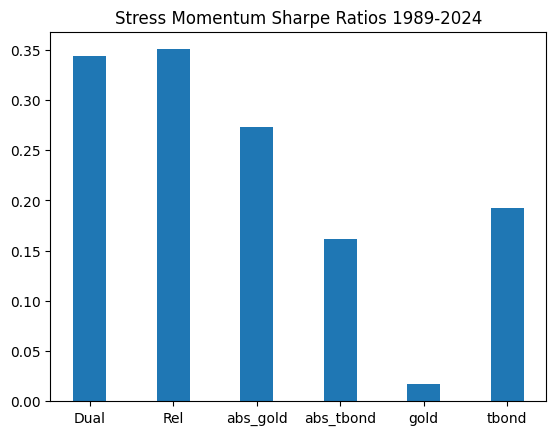

In [ ]:
output_stress['p']=['Dual','Rel', 'abs_gold', 'abs_tbond','gold','tbond']
plt.bar(output_stress['p'],output_stress['Annual Sharpe'], width = 0.4)
plt.title("Stress Momentum Sharpe Ratios 1989-2024")
plt.show()

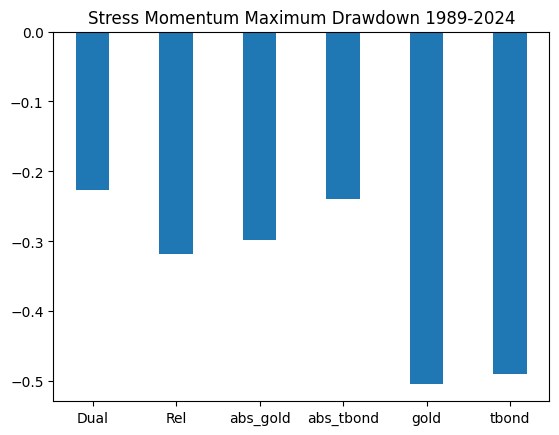

In [ ]:
plt.bar(output_stress['p'],output_stress['drawdown'], width = 0.4)
plt.title("Stress Momentum Maximum Drawdown 1989-2024")
plt.show()

Download Results

In [ ]:
df.to_csv("returns.csv", index=False)
files.download("returns.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>